# Regression problem on housing.csv

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PowerTransformer, MinMaxScaler,MaxAbsScaler,QuantileTransformer,RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
import xgboost

In [2]:
directory = os.path.join('D:/Bootcamp ML - Mada/regression dataset/', 'housing.csv')
if os.path.isfile(directory):
  print("File ditemukan")
else:
    print("tidak ada")

File ditemukan


In [3]:
dataset = pd.read_csv(directory)
dataset.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
dataset.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
dataset['crim'].value_counts()

14.33370    2
0.01501     2
0.08265     1
1.35472     1
0.03615     1
           ..
0.11460     1
0.03237     1
5.82115     1
0.02187     1
0.03578     1
Name: crim, Length: 504, dtype: int64

## Replace '0' values from zn feature with the mean values

In [7]:
mean_zn = dataset['zn'].astype('float').mean(axis=0)
dataset['zn'].replace(0.0, mean_zn , inplace=True)
dataset.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.000000,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,11.363636,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,11.363636,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,11.363636,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,11.363636,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [8]:
dataset.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,19.717930,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,19.464872,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,11.363636,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,11.363636,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,11.363636,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Plotting Histogram

array([[<AxesSubplot:title={'center':'crim'}>,
        <AxesSubplot:title={'center':'zn'}>,
        <AxesSubplot:title={'center':'indus'}>,
        <AxesSubplot:title={'center':'chas'}>],
       [<AxesSubplot:title={'center':'nox'}>,
        <AxesSubplot:title={'center':'rm'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'dis'}>],
       [<AxesSubplot:title={'center':'rad'}>,
        <AxesSubplot:title={'center':'tax'}>,
        <AxesSubplot:title={'center':'ptratio'}>,
        <AxesSubplot:title={'center':'b'}>],
       [<AxesSubplot:title={'center':'lstat'}>,
        <AxesSubplot:title={'center':'medv'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

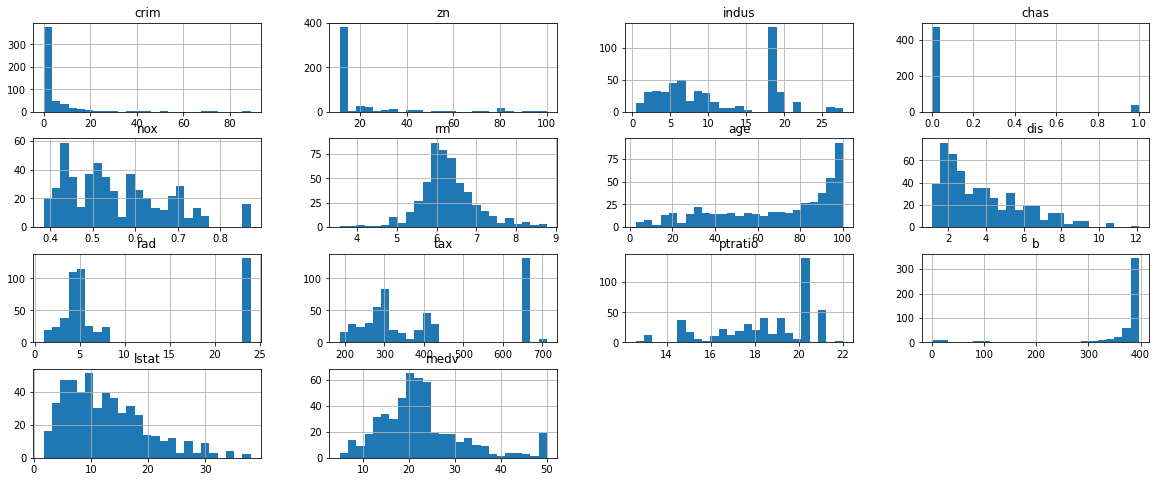

In [9]:
dataset.hist(bins=25,figsize=(20,8))

## Correlation Matrix of the features

In [10]:
    correlation_matrix = dataset.corr()
corr = correlation_matrix['medv'].sort_values(ascending=False)
correlation_dataframe = pd.DataFrame({'column': corr.index,
                 'Correlation with medv': corr.values})
correlation_dataframe

,column,Correlation with medv
0,medv,1.000000
1,rm,0.695360
2,zn,0.335582
3,b,0.333461
4,dis,0.249929
5,chas,0.175260
6,age,-0.376955
7,rad,-0.381626
8,crim,-0.388305
9,nox,-0.427321


<AxesSubplot:>

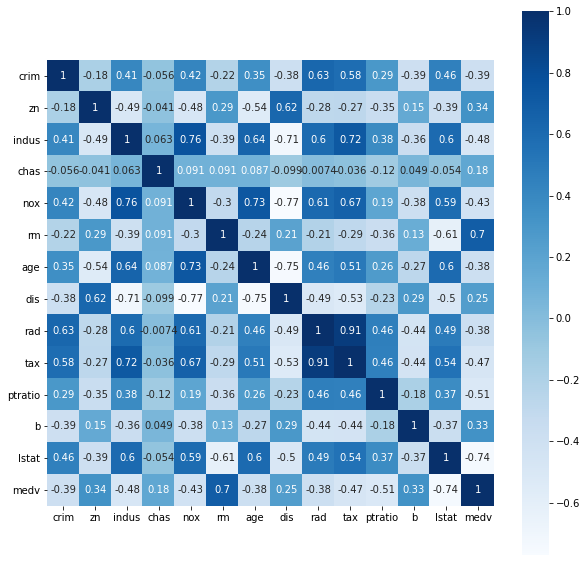

In [11]:
fig = plt.subplots(figsize=(10,10))
sns.heatmap(correlation_matrix,vmax=1,square=True,annot=True,cmap='Blues')

## Feature Engineering using various Scaller Algorithm

In [12]:
label = dataset['medv'] #--> Target Prediksi
feature_used = dataset.drop(['medv',],axis=1) #--> Fitur yang digunakan adalah selain fitur 'quality'

# Scalling Data
scaler_1 = StandardScaler(with_mean=True,with_std=True,copy=True)
scaler_2 = PowerTransformer(method='yeo-johnson', standardize=True)
scaler_3 = PowerTransformer(method='box-cox',standardize=True)
scaler_4 = QuantileTransformer(n_quantiles=100,output_distribution='uniform', random_state=304)
scaler_5 = MinMaxScaler(feature_range=(0,1),copy=True)
scaler_6 = MaxAbsScaler(copy=True)
scaler_7 = RobustScaler(with_centering=True,with_scaling=True,quantile_range=(25.0,75.0))

x_1 = scaler_1.fit_transform(feature_used.values)
y_1 = scaler_1.fit_transform(label.values.reshape(-1,1)).flatten()

x_2 = scaler_2.fit_transform(feature_used.values)
y_2 = scaler_2.fit_transform(label.values.reshape(-1,1)).flatten()

#x_3 = scaler_3.fit_transform(feature_used.values)
#y_3 = scaler_3.fit_transform(label.values.reshape(-1,1)).flatten()

x_4 = scaler_4.fit_transform(feature_used.values)
y_4 = scaler_4.fit_transform(label.values.reshape(-1,1)).flatten()

x_5 = scaler_5.fit_transform(feature_used.values)
y_5 = scaler_5.fit_transform(label.values.reshape(-1,1)).flatten()

x_6 = scaler_6.fit_transform(feature_used.values)
y_6 = scaler_6.fit_transform(label.values.reshape(-1,1)).flatten()

x_7 = scaler_7.fit_transform(feature_used.values)
y_7 = scaler_7.fit_transform(label.values.reshape(-1,1)).flatten()


In [13]:
def scores(test,prediction):
    print("skor r2 : {:.3f}".format(r2_score(test,prediction)))
    print("skor mse : {:.3f}".format(mean_squared_error(test,prediction)))
    print("skor mea : {:.3f}".format(mean_absolute_error(test,prediction)))
    print("skor RMSE : {:.3f}".format(np.sqrt(mean_squared_error(test,prediction))))

## Not using box-cox scaller because its only works in data with absolute positive value

## Scaler Power transformer menggunakan box-cox tidak bisa digunakan karena data pada fitur terdapat nilai 0. Box-cox hanya bisa digunakan dengan data yang benar-benar positif ( nilai > 0)

Solusinya adalah dengan menghapus atau mengganti nilai 0 pada fitur

[0.87805489 0.53825112 0.78632918 0.7902404  0.78068251 0.76893236
 0.66670026 0.7505459  0.71733367 0.55049417]
skor r2 : 0.672
skor mse : 0.387
skor mea : 0.422
skor RMSE : 0.622


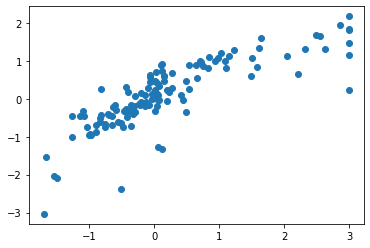

In [21]:
# Menggunakan Standard Scaler
feature_train, feature_test, label_train, label_test = train_test_split(x_1, y_1, test_size = 0.25, random_state=10)
linear_reg = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
linear_reg.fit(feature_train,label_train)
cross_val = cross_val_score(linear_reg, feature_train, label_train, cv=10)
print(cross_val)
predictions = linear_reg.predict(feature_test)
scores(label_test,predictions)
plt.scatter(label_test,predictions)

[0.88563824 0.76616605 0.85270371 0.72191244 0.75749961 0.68807163
 0.5429042  0.81061679 0.64169994 0.62934548]
skor r2 : 0.767
skor mse : 0.237
skor mea : 0.352
skor RMSE : 0.487


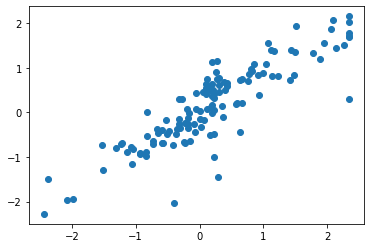

In [15]:
# Menggunakan Power Transform 'yeo-jhonson'
feature_train, feature_test, label_train, label_test = train_test_split(x_2, y_2, test_size = 0.25, random_state=10)
linear_reg = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
linear_reg.fit(feature_train,label_train)
cross_val = cross_val_score(linear_reg, feature_train, label_train, cv=10)
print(cross_val)
predictions = linear_reg.predict(feature_test)
scores(label_test,predictions)
plt.scatter(label_test,predictions)

[0.87946308 0.77665517 0.82974224 0.70830983 0.83490071 0.80216023
 0.6531498  0.835979   0.67167217 0.75440609]
skor r2 : 0.767
skor mse : 0.019
skor mea : 0.104
skor RMSE : 0.139


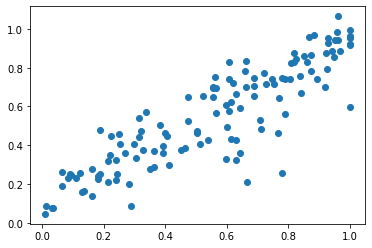

In [16]:
# Menggunakan Quantile Transform 
feature_train, feature_test, label_train, label_test = train_test_split(x_4, y_4, test_size = 0.25, random_state=10)
linear_reg = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
linear_reg.fit(feature_train,label_train)
cross_val = cross_val_score(linear_reg, feature_train, label_train, cv=10)
print(cross_val)
predictions = linear_reg.predict(feature_test)
scores(label_test,predictions)
plt.scatter(label_test,predictions)

[0.87805489 0.53825112 0.78632918 0.7902404  0.78068251 0.76893236
 0.66670026 0.7505459  0.71733367 0.55049417]
skor r2 : 0.672
skor mse : 0.016
skor mea : 0.086
skor RMSE : 0.127


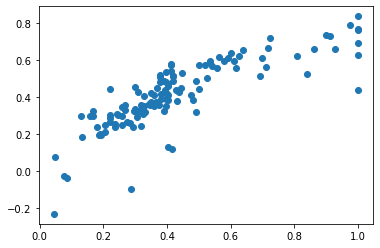

In [17]:
# Menggunakan min-max Transform 
feature_train, feature_test, label_train, label_test = train_test_split(x_5, y_5, test_size = 0.25, random_state=10)
linear_reg = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
linear_reg.fit(feature_train,label_train)
cross_val = cross_val_score(linear_reg, feature_train,label_train, cv=10)
print(cross_val)
predictions = linear_reg.predict(feature_test)
scores(label_test,predictions)
plt.scatter(label_test,predictions)

[0.87805489 0.53825112 0.78632918 0.7902404  0.78068251 0.76893236
 0.66670026 0.7505459  0.71733367 0.55049417]
skor r2 : 0.672
skor mse : 0.013
skor mea : 0.078
skor RMSE : 0.114


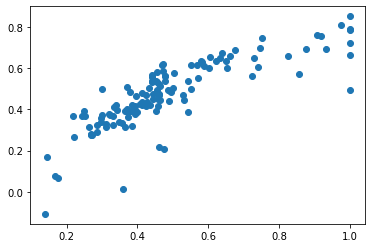

In [18]:
# Menggunakan max absolute scaller
feature_train, feature_test, label_train, label_test = train_test_split(x_6, y_6, test_size = 0.25, random_state=10)
linear_reg = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
linear_reg.fit(feature_train,label_train)
cross_val = cross_val_score(linear_reg,feature_train,label_train, cv=10)
print(cross_val)              
predictions = linear_reg.predict(feature_test)
scores(label_test,predictions)
plt.scatter(label_test,predictions)

[0.87805489 0.53825112 0.78632918 0.7902404  0.78068251 0.76893236
 0.66670026 0.7505459  0.71733367 0.55049417]
skor r2 : 0.672
skor mse : 0.514
skor mea : 0.486
skor RMSE : 0.717


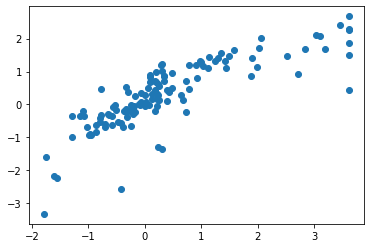

In [19]:
# Menggunakan robust scaller
feature_train, feature_test, label_train, label_test = train_test_split(x_7, y_7, test_size = 0.25, random_state=10)
linear_reg = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
linear_reg.fit(feature_train,label_train)
cross_val = cross_val_score(linear_reg,feature_train,label_train, cv=10)
print(cross_val)
predictions = linear_reg.predict(feature_test)
scores(label_test,predictions)
plt.scatter(label_test,predictions)

# RandomForestRegressor

[0.92064164 0.85119395 0.92894017 0.84472419 0.91281663 0.85186975
 0.84558982 0.75588182 0.8619529  0.67638659]
skor r2 : 0.863
skor mse : 0.162
skor mea : 0.284
skor RMSE : 0.402


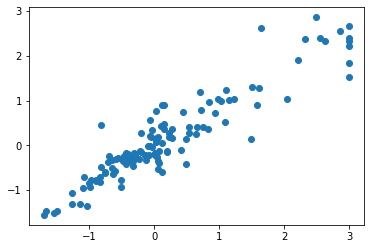

In [20]:
feature_train, feature_test, label_train, label_test = train_test_split(x_1, y_1, test_size = 0.25, random_state=10)
rfr = RandomForestRegressor(n_estimators=100,criterion='mse',max_features='auto')
rfr.fit(feature_train,label_train)
cross_val = cross_val_score(rfr,feature_train,label_train, cv=10)
print(cross_val)
predictions = rfr.predict(feature_test)
scores(label_test,predictions)
plt.scatter(label_test,predictions)

# XGBoost Regressor

[0.90424763 0.95637236 0.93168454 0.87727884 0.92792508 0.86076715
 0.81777862 0.8497531  0.79059608 0.84376911]
skor r2 : 0.879
skor mse : 0.123
skor mea : 0.247
skor RMSE : 0.350


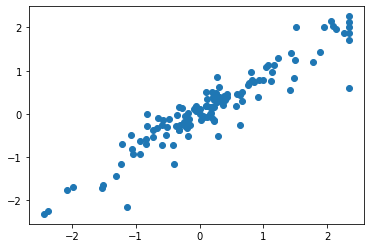

In [28]:
feature_train, feature_test, label_train, label_test = train_test_split(x_2, y_2, test_size = 0.25, random_state=10)
xgb = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.01,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)

xgb.fit(feature_train,label_train)
cross_val = cross_val_score(xgb,feature_train,label_train, cv=10)
print(cross_val)
predictions = xgb.predict(feature_test)
scores(label_test,predictions)
plt.scatter(label_test,predictions)

# SVM

In [23]:
feature_train, feature_test, label_train, label_test = train_test_split(x_1, y_1, test_size = 0.25, random_state=10)
kernels =['poly','linear','rbf']
for index,value in enumerate(kernels):
    print("Menggunakan kernel "+str(value))
    svm = SVR(kernel=value)
    svm.fit(feature_train,label_train)
    cross_val = cross_val_score(svm,feature_train,label_train, cv=10)
    print(cross_val)
    predictions = svm.predict(feature_test)
    scores(label_test,predictions)
    print()

Menggunakan kernel poly
[ 0.8374486   0.71925968  0.83779142  0.71458441  0.83101008  0.82372829
  0.716815   -0.55774665  0.74902551  0.47134418]
skor r2 : 0.749
skor mse : 0.296
skor mea : 0.377
skor RMSE : 0.544

Menggunakan kernel linear
[0.87579929 0.42643032 0.77363881 0.68360404 0.78812394 0.82056092
 0.6744046  0.75444944 0.73584066 0.46374484]
skor r2 : 0.636
skor mse : 0.430
skor mea : 0.419
skor RMSE : 0.656

Menggunakan kernel rbf
[0.92566043 0.71709293 0.85868322 0.92311935 0.84614553 0.87962061
 0.85272492 0.88847469 0.67985736 0.48183709]
skor r2 : 0.767
skor mse : 0.276
skor mea : 0.313
skor RMSE : 0.525



# KNN Regressor

In [24]:
feature_train, feature_test, label_train, label_test = train_test_split(x_1, y_1, test_size = 0.25, random_state=10)
numbers =16
for i in range(numbers):
    if i % 2 !=0:
        print("Menggunakan nilai k :"+str(i))
        knn = KNeighborsRegressor(n_neighbors=i,algorithm='auto',weights='distance')
        knn.fit(feature_train,label_train)
        cross_val = cross_val_score(knn,feature_train,label_train, cv=10)
        print(cross_val)
        predictions = knn.predict(feature_test)
        scores(label_test,predictions)
        print()

Menggunakan nilai k :1
[0.81707834 0.34006161 0.67271995 0.81706285 0.74247909 0.84818522
 0.80184612 0.46727518 0.65541074 0.47862701]
skor r2 : 0.703
skor mse : 0.351
skor mea : 0.369
skor RMSE : 0.592

Menggunakan nilai k :3
[0.87744962 0.61327867 0.72046279 0.89735798 0.75579719 0.83497242
 0.8610733  0.85752591 0.807469   0.39792735]
skor r2 : 0.799
skor mse : 0.237
skor mea : 0.322
skor RMSE : 0.487

Menggunakan nilai k :5
[0.86337701 0.70599861 0.76526167 0.91031063 0.77744384 0.8379338
 0.82626589 0.84470274 0.80234432 0.37426428]
skor r2 : 0.747
skor mse : 0.298
skor mea : 0.348
skor RMSE : 0.546

Menggunakan nilai k :7
[0.89123994 0.67939034 0.80039189 0.89431418 0.76630988 0.84849727
 0.81355603 0.86320821 0.80205542 0.40935646]
skor r2 : 0.740
skor mse : 0.307
skor mea : 0.354
skor RMSE : 0.554

Menggunakan nilai k :9
[0.90812001 0.62199406 0.81250715 0.8936771  0.78831209 0.83420468
 0.79667137 0.85818436 0.77381669 0.40636247]
skor r2 : 0.733
skor mse : 0.315
skor mea : 0